### Import Modules and Dependencies

In [1]:
import librosa
import matplotlib.pyplot as plt
import copy

### Load, plot and play the test audio sample

In [2]:
x,sr = librosa.load('../../../Violin.wav', sr=44100)

[-0.0022583  -0.00314331 -0.003479   ...  0.00091553  0.00091553
  0.00091553]


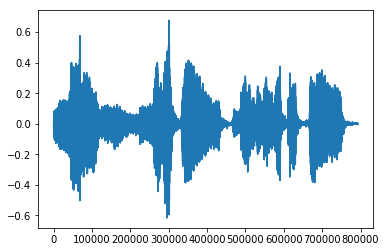

In [3]:
print(x)

plt.plot(x)

In [4]:
!play ../../../Violin.wav


../../../Violin.wav:

 File Size: 1.59M     Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:17.99  

In:100%  00:00:17.99 [00:00:00.00] Out:793k  [      |      ]        Clip:0    
Done.


In [5]:
limit = len(x)

### Choose encryption-decryption key

In [6]:
key = "test"

### Re-format key

In [7]:
def convKey(key):
    key = set(list(key))
    key = [ord(e) for e in key]
    key.sort()
    return key

In [8]:
key = convKey(key)
print(key)

[101, 115, 116]


### Generate indices using key

In [9]:
def genInd(key):
    c = 1
    ind = []
    
    while(True):
        temp = [i*c for i in key]
        if(any(c>limit for c in temp)):
            break
    
        ind += temp
        c += 269
    
    ind.sort()
    return ind

In [10]:
ind = genInd(key)
print(ind)

[101, 115, 116, 27270, 31050, 31320, 54439, 61985, 62524, 81608, 92920, 93728, 108777, 123855, 124932, 135946, 154790, 156136, 163115, 185725, 187340, 190284, 216660, 217453, 218544, 244622, 247595, 249748, 271791, 278530, 280952, 298960, 309465, 312156, 326129, 340400, 343360, 353298, 371335, 374564, 380467, 402270, 405768, 407636, 433205, 434805, 436972, 461974, 464140, 468176, 489143, 495075, 499380, 516312, 526010, 530584, 543481, 556945, 561788, 570650, 587880, 592992, 597819, 618815, 624196, 624988, 649750, 652157, 655400, 679326, 680685, 686604, 711620, 717808, 742555, 749012, 773490, 780216]


### Encrypt

In [11]:
y = copy.deepcopy(x)
y

array([-0.0022583 , -0.00314331, -0.003479  , ...,  0.00091553,
        0.00091553,  0.00091553], dtype=float32)

In [12]:
def encDec(data, ind):
    start = 0
    sec = 1

    for i in ind:
        stop = i
        if sec%2==0:
            data[start:stop] = data[start:stop][::-1]   

        start = stop
        sec += 1

    stop = len(data)
    if sec%2==0:
        data[start:stop] = data[start:stop][::-1]
        
    return data

In [13]:
#Encryption
y = encDec(y, ind)
print(y)

[-0.0022583  -0.00314331 -0.003479   ...  0.00091553  0.00091553
  0.00091553]


In [14]:
import soundfile as sf

In [15]:
sf.write('finEnc.wav', y, sr, subtype='PCM_16')

In [16]:
!play finEnc.wav


finEnc.wav:

 File Size: 1.59M     Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:17.99  

In:100%  00:00:17.99 [00:00:00.00] Out:793k  [      |      ]        Clip:0    
Done.


### Load encrypted audio sample

In [17]:
z,sr = librosa.load('finEnc.wav', sr=44100)

[-0.0022583  -0.00314331 -0.003479   ...  0.00091553  0.00091553
  0.00091553]


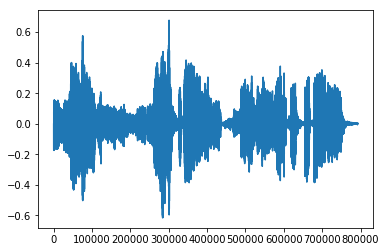

In [18]:
print(z)

plt.plot(z)

### Decrypt

In [19]:
#Decryption
z = encDec(z, ind)
print(z)

[-0.0022583  -0.00314331 -0.003479   ...  0.00091553  0.00091553
  0.00091553]


In [20]:
sf.write('finDec.wav', z, sr, subtype='PCM_16')

In [21]:
!play finDec.wav


finDec.wav:

 File Size: 1.59M     Bit Rate: 706k
  Encoding: Signed PCM    
  Channels: 1 @ 16-bit   
Samplerate: 44100Hz      
Replaygain: off         
  Duration: 00:00:17.99  

In:100%  00:00:17.99 [00:00:00.00] Out:793k  [      |      ]        Clip:0    
Done.
